In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("dataFiles/omega.txt", "r") as f:
    omega = list((map(float, f.readlines())))
with open("dataFiles/transformedSelfEnergy.txt", "r") as f:
    transformedSelfEnergy = list((map(float, f.readlines())))

In [3]:
def fitting_func(x, a, b):
    return a * (x ** b)

In [29]:
len(omega)

32769

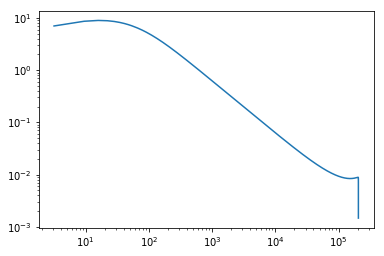

In [10]:
plt.plot(omega, transformedSelfEnergy)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [4]:
partial_omega = omega[80:3200]

In [5]:
partial_transformedSelfEnergy = transformedSelfEnergy[80:3200]

In [6]:
popt, pcov = curve_fit(fitting_func, partial_omega, partial_transformedSelfEnergy)

In [7]:
print("fitting function = a * (x ** b)")
print("parameters   = {}".format(popt))
print("standard dev = {}".format(np.sqrt(np.diag(pcov))))

fitting function = a * (x ** b)
parameters   = [592.42722161  -0.99297181]
standard dev = [1.93055729e-01 4.53868666e-05]


In [8]:
fitting_data = []
for o in partial_omega:
    fitting_data.append(fitting_func(o, *popt))

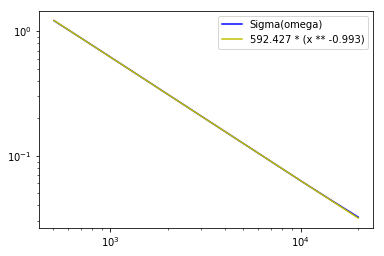

In [9]:
plt.plot(partial_omega, partial_transformedSelfEnergy, 'b', label="Sigma(omega)")
plt.plot(partial_omega, fitting_data, 'y', label="%5.3f * (x ** %5.3f)" % tuple(popt))
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()